In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
df = df.drop(['ID'],1)

In [8]:
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [9]:
print(df.shape)
df.query('MARRIAGE!=0 and EDUCATION!=0', inplace = True)
print(df.shape)

(30000, 24)
(29932, 24)


In [10]:
##EDA
print(df['default.payment.next.month'].value_counts())
df.describe()

0    23301
1     6631
Name: default.payment.next.month, dtype: int64


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,...,29932.000000,29932.00000,29932.000000,29932.000000,2.993200e+04,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000
mean,167523.375651,1.603568,1.852399,1.554590,35.479721,-0.016203,-0.133235,-0.165776,-0.220099,-0.265569,...,43320.699452,40367.54861,38927.267072,5659.603034,5.923502e+03,5226.158760,4830.180075,4805.269310,5221.906421,0.221535
std,129821.209970,0.489164,0.788941,0.518277,9.219044,1.123450,1.196990,1.196386,1.168849,1.133057,...,64385.857098,60845.48775,59601.231051,16555.874642,2.306020e+04,17620.773728,15680.849676,15294.066811,17795.285035,0.415287
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.00000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2339.750000,1772.75000,1261.000000,1000.000000,8.360000e+02,390.000000,298.000000,255.000000,122.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19068.500000,18125.50000,17111.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54613.250000,50253.50000,49260.250000,5006.000000,5.000000e+03,4507.250000,4015.000000,4040.250000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.00000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
pd.crosstab(df['default.payment.next.month'],[df['SEX'],df['EDUCATION'],df['MARRIAGE']])

SEX                            1                                              \
EDUCATION                      1               2              3            4   
MARRIAGE                       1     2   3     1     2   3    1    2   3   1   
default.payment.next.month                                                     
0                           1300  2127  20  1727  2194  44  745  665  25  16   
1                            390   506  10   643   746  19  303  229  11   2   

SEX                         ...   2                                  
EDUCATION                   ...   3   4          5          6        
MARRIAGE                    ...   3   1   2  3   1   2  3   1  2  3  
default.payment.next.month  ...                                      
0                           ...  51  33  43  2  97  74  2  13  7  2  
1                           ...  16   1   2  0   5   7  0   1  3  0  

[2 rows x 35 columns]

In [41]:
list_of_col = df.columns
print(list_of_col)
pd.pivot_table(df,'default.payment.next.month',['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


default.payment.next.month
LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5 PAY_6 BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6                            
10000.0   1   1         1        38  -1    -1     2     0     0     2     4711.0    9617.0    9307.0   9665.0    10470.0   10169.0   5000.0   0.0      500.0    1100.0   0.0      1000.0                           1.0
                                 40   2    -1    -1    -2    -2    -2     3567.0    1000.0    0.0      0.0       0.0       0.0       5000.0   0.0      0.0      0.0      0.0      0.0                              1.0
                                 41   0     0     3     2     2     2     6859.0    9751.0    9451.0   9169.0    10056.0   8559.0    3000.0   0.0      0.0      1002.0   0.0      500.0                            0.0
                                 42   4     3     2     2     2     0     6744.0    6494.0    6247.0   7975.0    7701.0    7787.0    0.0      0.0      2000.0   0.0      359.0    331.0                            0.0
                                 48   1     2     0     0     0     0     8594.0    7421.0    8145.0   9000.0    9000.0    0.0       0.0      2000.0   2000.0   0.0      0.0      0.0                              0.0
                                 50   0     0     0     0     0     0     10043.0   9616.0    9718.0   9916.0    9250.0    7461.0    1194.0   1076.0   274.0    370.0    472.0    375.0                            0.0
                        2        22   0    -1    -1    -1    -1    -1     1483.0    46.0      915.0    352.0     105.0     0.0       46.0     915.0    352.0    105.0    0.0      1000.0                           0.0
                                            0    -1    -1    -1    -1     2946.0    0.0       390.0    390.0     390.0     0.0       0.0      390.0    390.0    390.0    0.0      780.0                            1.0
                                                  0     0     0     3     4060.0    2774.0    3764.0   4001.0    5134.0    4762.0    1300.0   1200.0   300.0    1200.0   0.0      0.0                              0.0
                                      2     2     2     0     0     2     6883.0    9108.0    8813.0   10066.0   10017.0   9705.0    2500.0   0.0      1400.0   1100.0   0.0      500.0                            1.0
                                 23  -1     2    -1    -1    -1    -2     780.0     390.0     390.0    780.0     0.0       0.0       0.0      390.0    780.0    0.0      0.0      0.0                              1.0
                                                                   -1     780.0     390.0     390.0    0.0       780.0     0.0       0.0      390.0    0.0      780.0    0.0      0.0                              1.0
                                      0     0     0     0     0     0     6927.0    5313.0    6264.0   5970.0    7175.0    6032.0    1500.0   3500.0   1000.0   2000.0   2500.0   1000.0                           0.0
                                                                          7684.0    8685.0    8557.0   7319.0    7650.0    8862.0    1300.0   1500.0   500.0    600.0    1500.0   0.0                              0.0
                                                  2     2     4     5     3035.0    5802.0    5561.0   8455.0    9730.0    8999.0    3000.0   0.0      3000.0   2000.0   0.0      0.0                              0.0
                                      1    -2    -2    -2    -2    -2     0.0       0.0       0.0      0.0       0.0       0.0       0.0      0.0      0.0      0.0      0.0      0.0                              0.0
                                            2     0     0     0     2     9020.0    8707.0    8519.0   9505.0    10127.0   9677.0    0.0      1391.0   1300.0   900.0    0.0      500.0                            1.0
                                      2     2     2     2    -2    -1     2724.0    5520.0    5275.0   

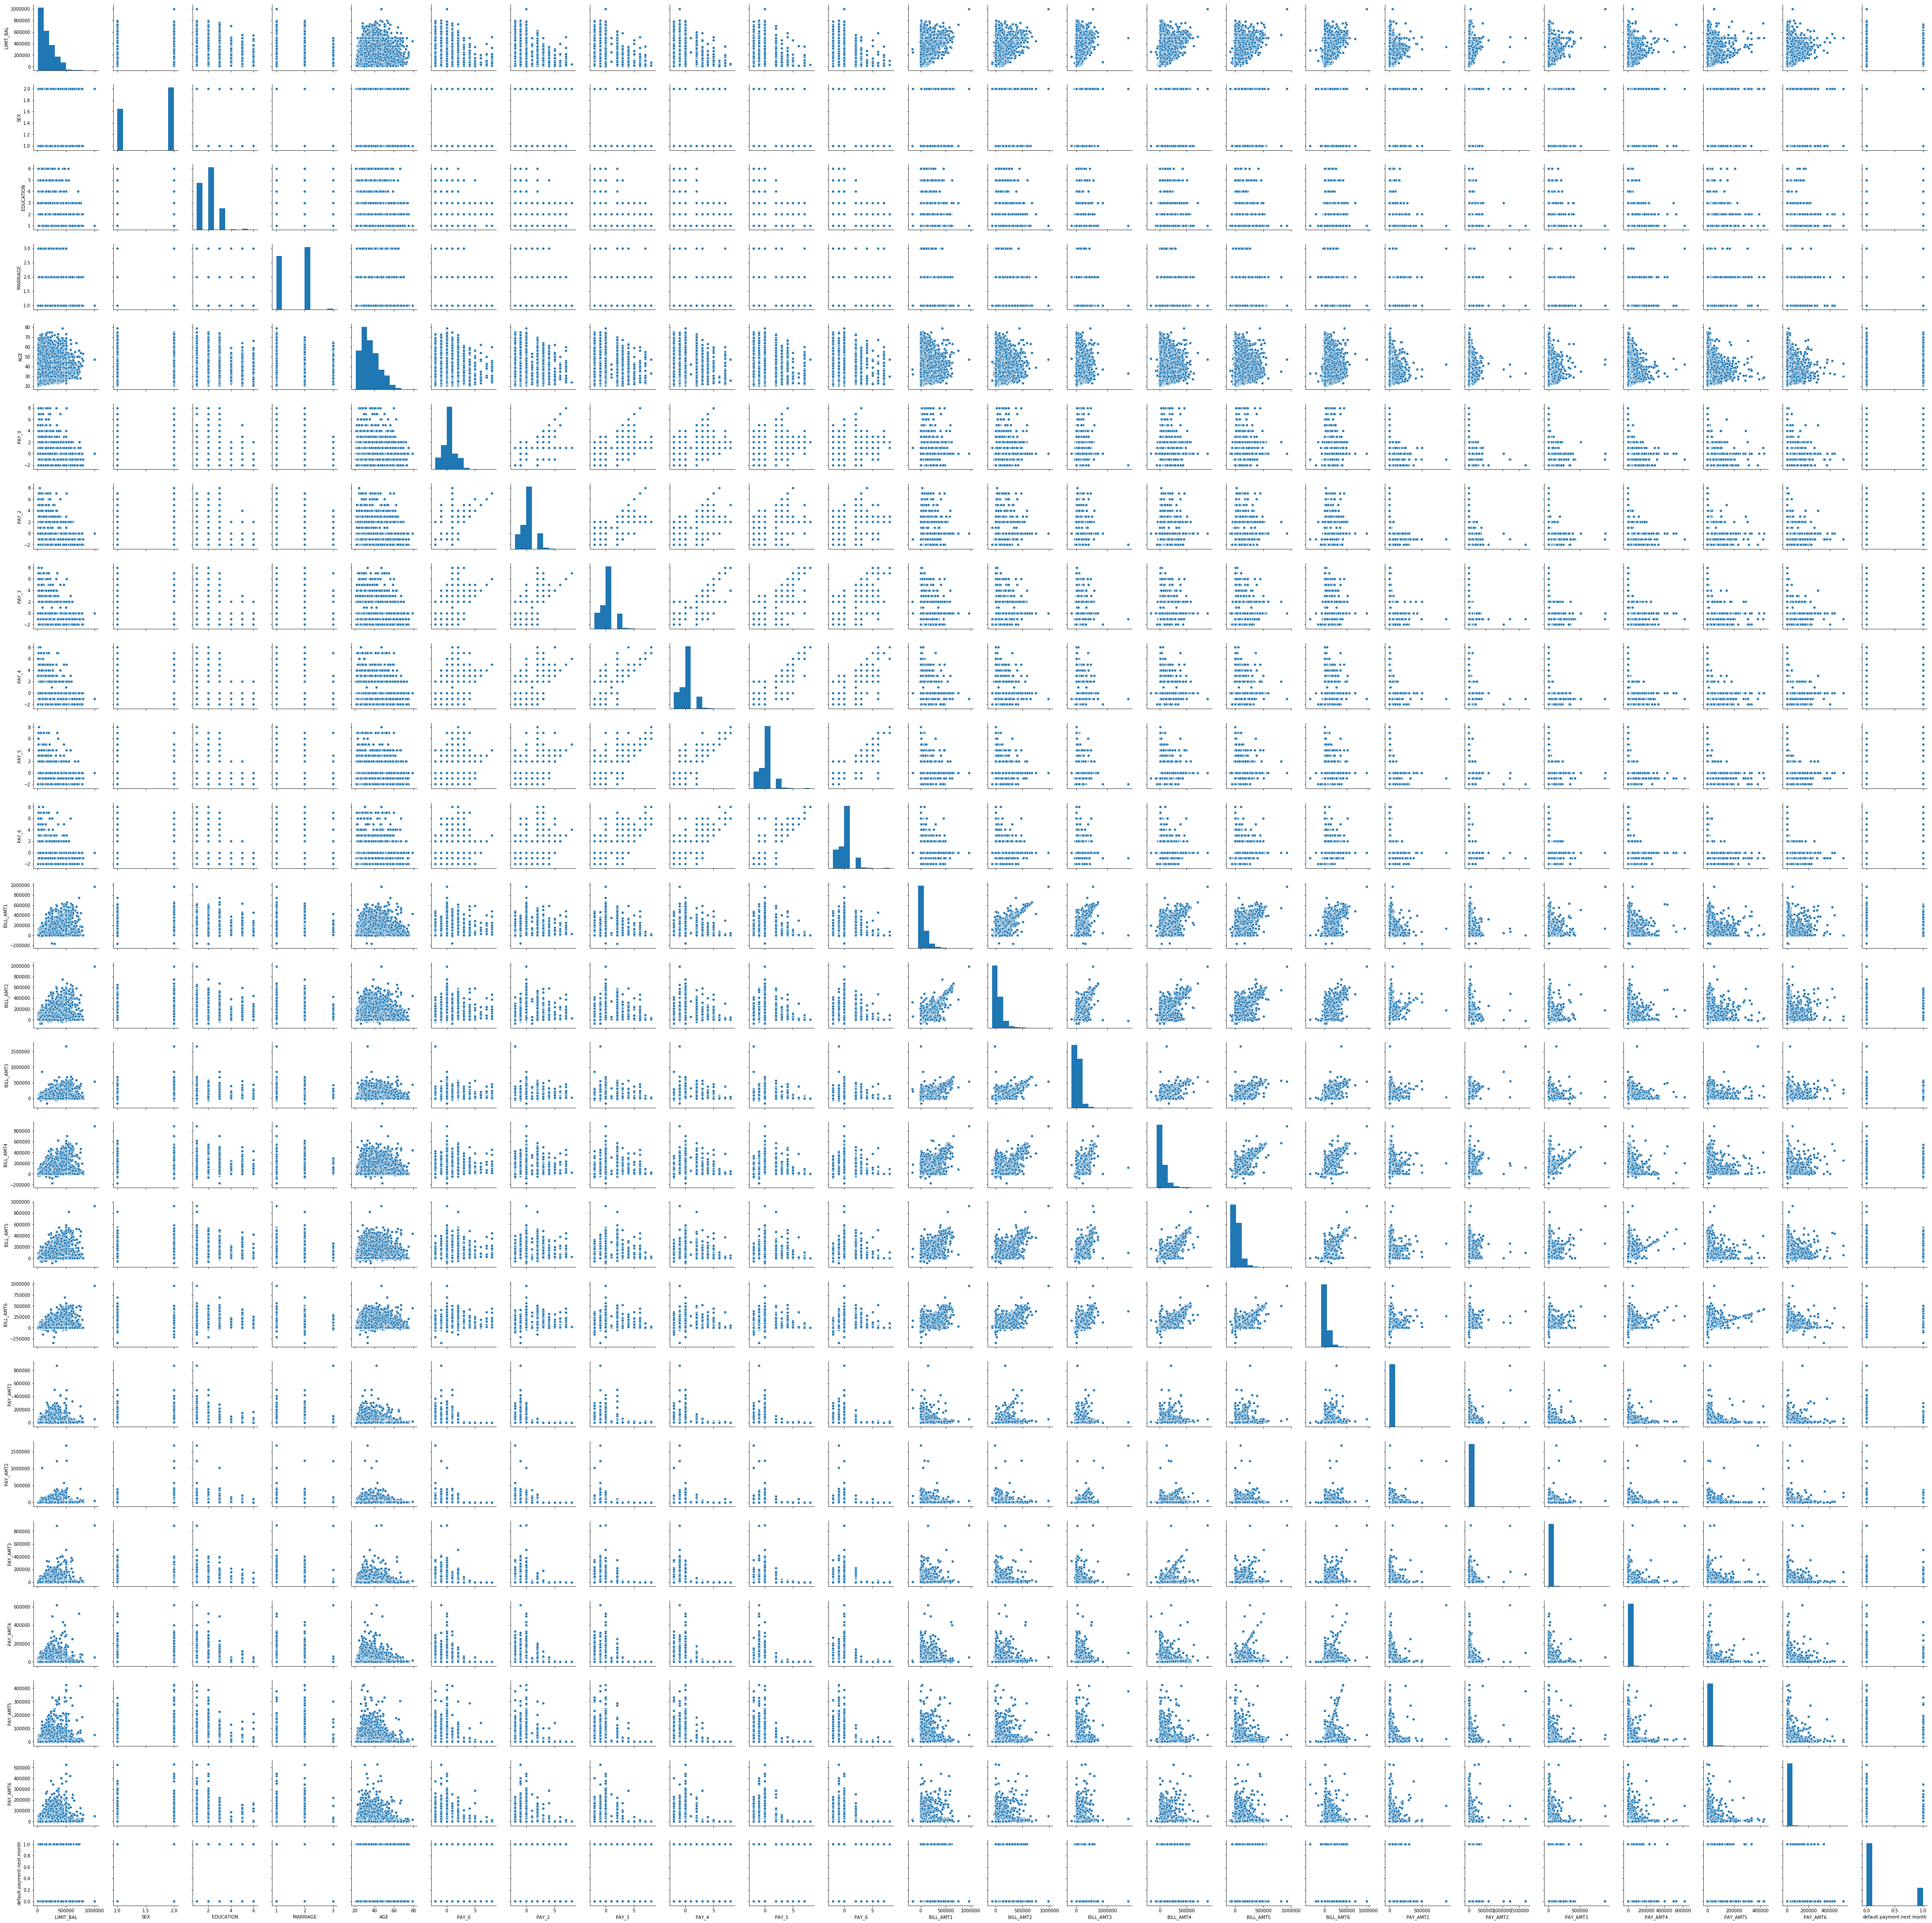

In [42]:
##Pairplot
import seaborn as sns
sns.pairplot(df)

In [43]:
df['default.payment.next.month'].value_counts()

0    23301
1     6631
Name: default.payment.next.month, dtype: int64

In [12]:
##Normalization
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
categorical = df[['SEX','EDUCATION','MARRIAGE']]

In [13]:
cat=enc.fit_transform(categorical)
pd_cat=pd.DataFrame(cat.toarray(),columns= ["Male", "Female","GraduateSchool", "University", "HighSchool", "OtherSchool","Unknown1","Unknown2","Married", "Single", "OtherMarriage"])
df = pd.concat([df,pd_cat],1)
df.head()
df=df.drop(['SEX','EDUCATION','MARRIAGE'],1)

E:\Ananconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [14]:
##Normalization
numerical_df=df[['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
categorical_df=df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6','default.payment.next.month',
       'Male', 'Female', 'GraduateSchool', 'University', 'HighSchool',
       'OtherSchool', 'Unknown1', 'Unknown2', 'Married', 'Single',
       'OtherMarriage']]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
listcols = numerical_df.columns
numerical_df=scaler.fit_transform(numerical_df)
numerical_df=pd.DataFrame(numerical_df,columns = listcols)
numerical_df.head()
df = pd.concat([numerical_df,categorical_df],1)
df.shape
df.head()
df=df.dropna()

In [15]:
## Train Test split
X=df.drop(['default.payment.next.month'],1)
y=df["default.payment.next.month"]
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(X,y,test_size=0.25,random_state=42)

In [113]:
##declare models,fit and cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,roc_auc_score
scores=pd.DataFrame(columns=['Model Name','Accuracy','Precision','Recall','F1-score','ROC-AUC Score'])

In [114]:
logreg = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=100)
lsvc = LinearSVC(random_state=42)
xgb=XGBClassifier()
logreg.fit(x_train,y_train)
rfc.fit(x_train,y_train)
lsvc.fit(x_train,y_train)
xgb.fit(x_train,y_train)

E:\Ananconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Ananconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [115]:
params={'C':[1,5]}
glogreg = GridSearchCV(logreg,params,cv=10)
glogreg.fit(x_train,y_train)
ypred = glogreg.predict(x_test)
scores = scores.append(pd.Series(['Logistic Regression',
                            accuracy_score(y_test,ypred),
                            precision_score(y_test,ypred),
                            recall_score(y_test,ypred),
                            f1_score(y_test,ypred),
                            roc_auc_score(y_test,ypred)],index=scores.columns),ignore_index=True)

E:\Ananconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Ananconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Ananconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Ananconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Ananconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Ananconda3\lib\site-pa

In [116]:
params={'n_estimators':[100,200]}
grfc = GridSearchCV(rfc,params,cv=5)
grfc.fit(x_train,y_train)
ypred = grfc.predict(x_test)
scores = scores.append(pd.Series(['Random Forest Classifier',
                            accuracy_score(y_test,ypred),
                            precision_score(y_test,ypred),
                            recall_score(y_test,ypred),
                            f1_score(y_test,ypred),
                            roc_auc_score(y_test,ypred)],index=scores.columns),ignore_index=True)

In [117]:
params={'C':[1, 10]}
glsvc = GridSearchCV(lsvc,params,cv=10)
glsvc.fit(x_train,y_train)
ypred = glsvc.predict(x_test)
scores = scores.append(pd.Series(['Linear SVC',
                            accuracy_score(y_test,ypred),
                            precision_score(y_test,ypred),
                            recall_score(y_test,ypred),
                            f1_score(y_test,ypred),
                            roc_auc_score(y_test,ypred)],index=scores.columns),ignore_index=True)

E:\Ananconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Ananconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Ananconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Ananconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Ananconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Ananconda3\lib\site-packages\skl

In [119]:
params={"learning_rate"    : [0.05] ,
 "gamma"            : [ 0.0, 0.1 ] }
gxg = GridSearchCV(xgb,params,cv=10)
gxg.fit(x_train,y_train)
ypred = gxg.predict(x_test)
scores = scores.append(pd.Series(['XGBoost',
                            accuracy_score(y_test,ypred),
                            precision_score(y_test,ypred),
                            recall_score(y_test,ypred),
                            f1_score(y_test,ypred),
                            roc_auc_score(y_test,ypred)],index=scores.columns),ignore_index=True)

In [120]:
scores.to_csv('Model_Runs.csv')

In [2]:
!pip install keras
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [16]:
from keras.layers import Dropout

In [35]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=31))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train, epochs=20, validation_split=0.3)#callbacks = [early_stopping_monitor],class_weight=class_weight)

Train on 15678 samples, validate on 6720 samples
Epoch 1/20
15678/15678 [==============================] - 2s 116us/step - loss: 0.4991 - acc: 0.7940 - val_loss: 0.4484 - val_acc: 0.8195
Epoch 2/20
15678/15678 [==============================] - 1s 66us/step - loss: 0.4493 - acc: 0.8157 - val_loss: 0.4391 - val_acc: 0.8199
Epoch 3/20
15678/15678 [==============================] - 1s 63us/step - loss: 0.4428 - acc: 0.8154 - val_loss: 0.4368 - val_acc: 0.8216
Epoch 4/20
15678/15678 [==============================] - 1s 64us/step - loss: 0.4389 - acc: 0.8177 - val_loss: 0.4354 - val_acc: 0.8213
Epoch 5/20
15678/15678 [==============================] - 1s 64us/step - loss: 0.4368 - acc: 0.8180 - val_loss: 0.4341 - val_acc: 0.8216
Epoch 6/20
15678/15678 [==============================] - 1s 75us/step - loss: 0.4355 - acc: 0.8172 - val_loss: 0.4339 - val_acc: 0.8213
Epoch 7/20
15678/15678 [==============================] - 1s 68us/step - loss: 0.4337 - acc: 0.8194 - val_loss: 0.4334 - val_acc

In [37]:
ypred = model.predict(x_test)

In [38]:
ypred

array([[0.3808546 ],
       [0.26157707],
       [0.10179424],
       ...,
       [0.10271305],
       [0.18456483],
       [0.67914397]], dtype=float32)

In [46]:
ypredd = []
for i in range(len(ypred)):
    if ypred[i] < 0.5:
        ypredd.append(0)
    else:
        ypredd.append(1)
    

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypredd)

0.8213233324403965